Raw Data Shape: (1050, 8)

First few rows:
   gender race_ethnicity parental_level_of_education         lunch  \
0  female            NaN                         NaN      standard   
1     NaN        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4     NaN            NaN                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                     NaN        72.0           72.0            NaN  
1                     NaN        69.0            NaN           88.0  
2                     NaN        90.0           95.0           93.0  
3                    none        47.0            NaN           44.0  
4                    none        76.0            NaN            NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns)

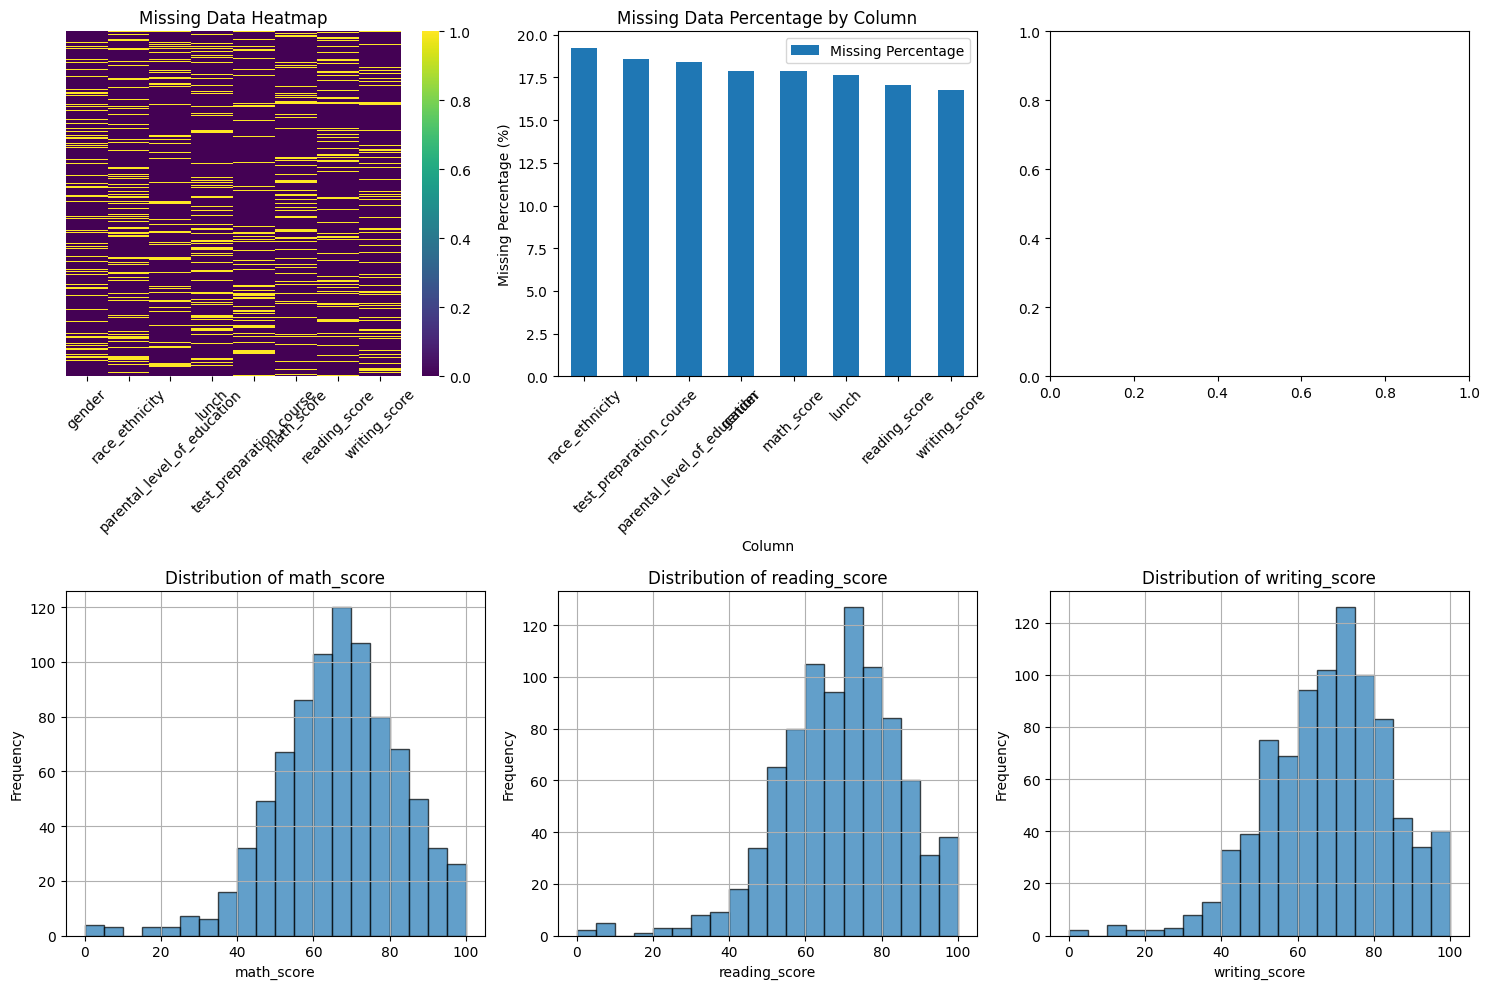

Starting data preprocessing...
Initial data shape: (1050, 8)
Removed 48 duplicate rows

Missing value analysis for categorical variables:
gender: 183 missing values (18.26%)
race_ethnicity: 191 missing values (19.06%)
parental_level_of_education: 183 missing values (18.26%)
lunch: 176 missing values (17.56%)
test_preparation_course: 192 missing values (19.16%)
Missing values in categorical columns after preprocessing:
gender: 0
race_ethnicity: 0
parental_level_of_education: 0
lunch: 0
test_preparation_course: 0

Missing value analysis for numerical variables:
math_score: 180 missing values (17.96%)
reading_score: 168 missing values (16.77%)
writing_score: 165 missing values (16.47%)
mean imputation completed
median imputation completed
knn imputation completed
iterative imputation completed


/var/folders/x9/g11f20ps45b0l8hqg5022bnr0000gp/T/ipykernel_37302/2059606252.py:121: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


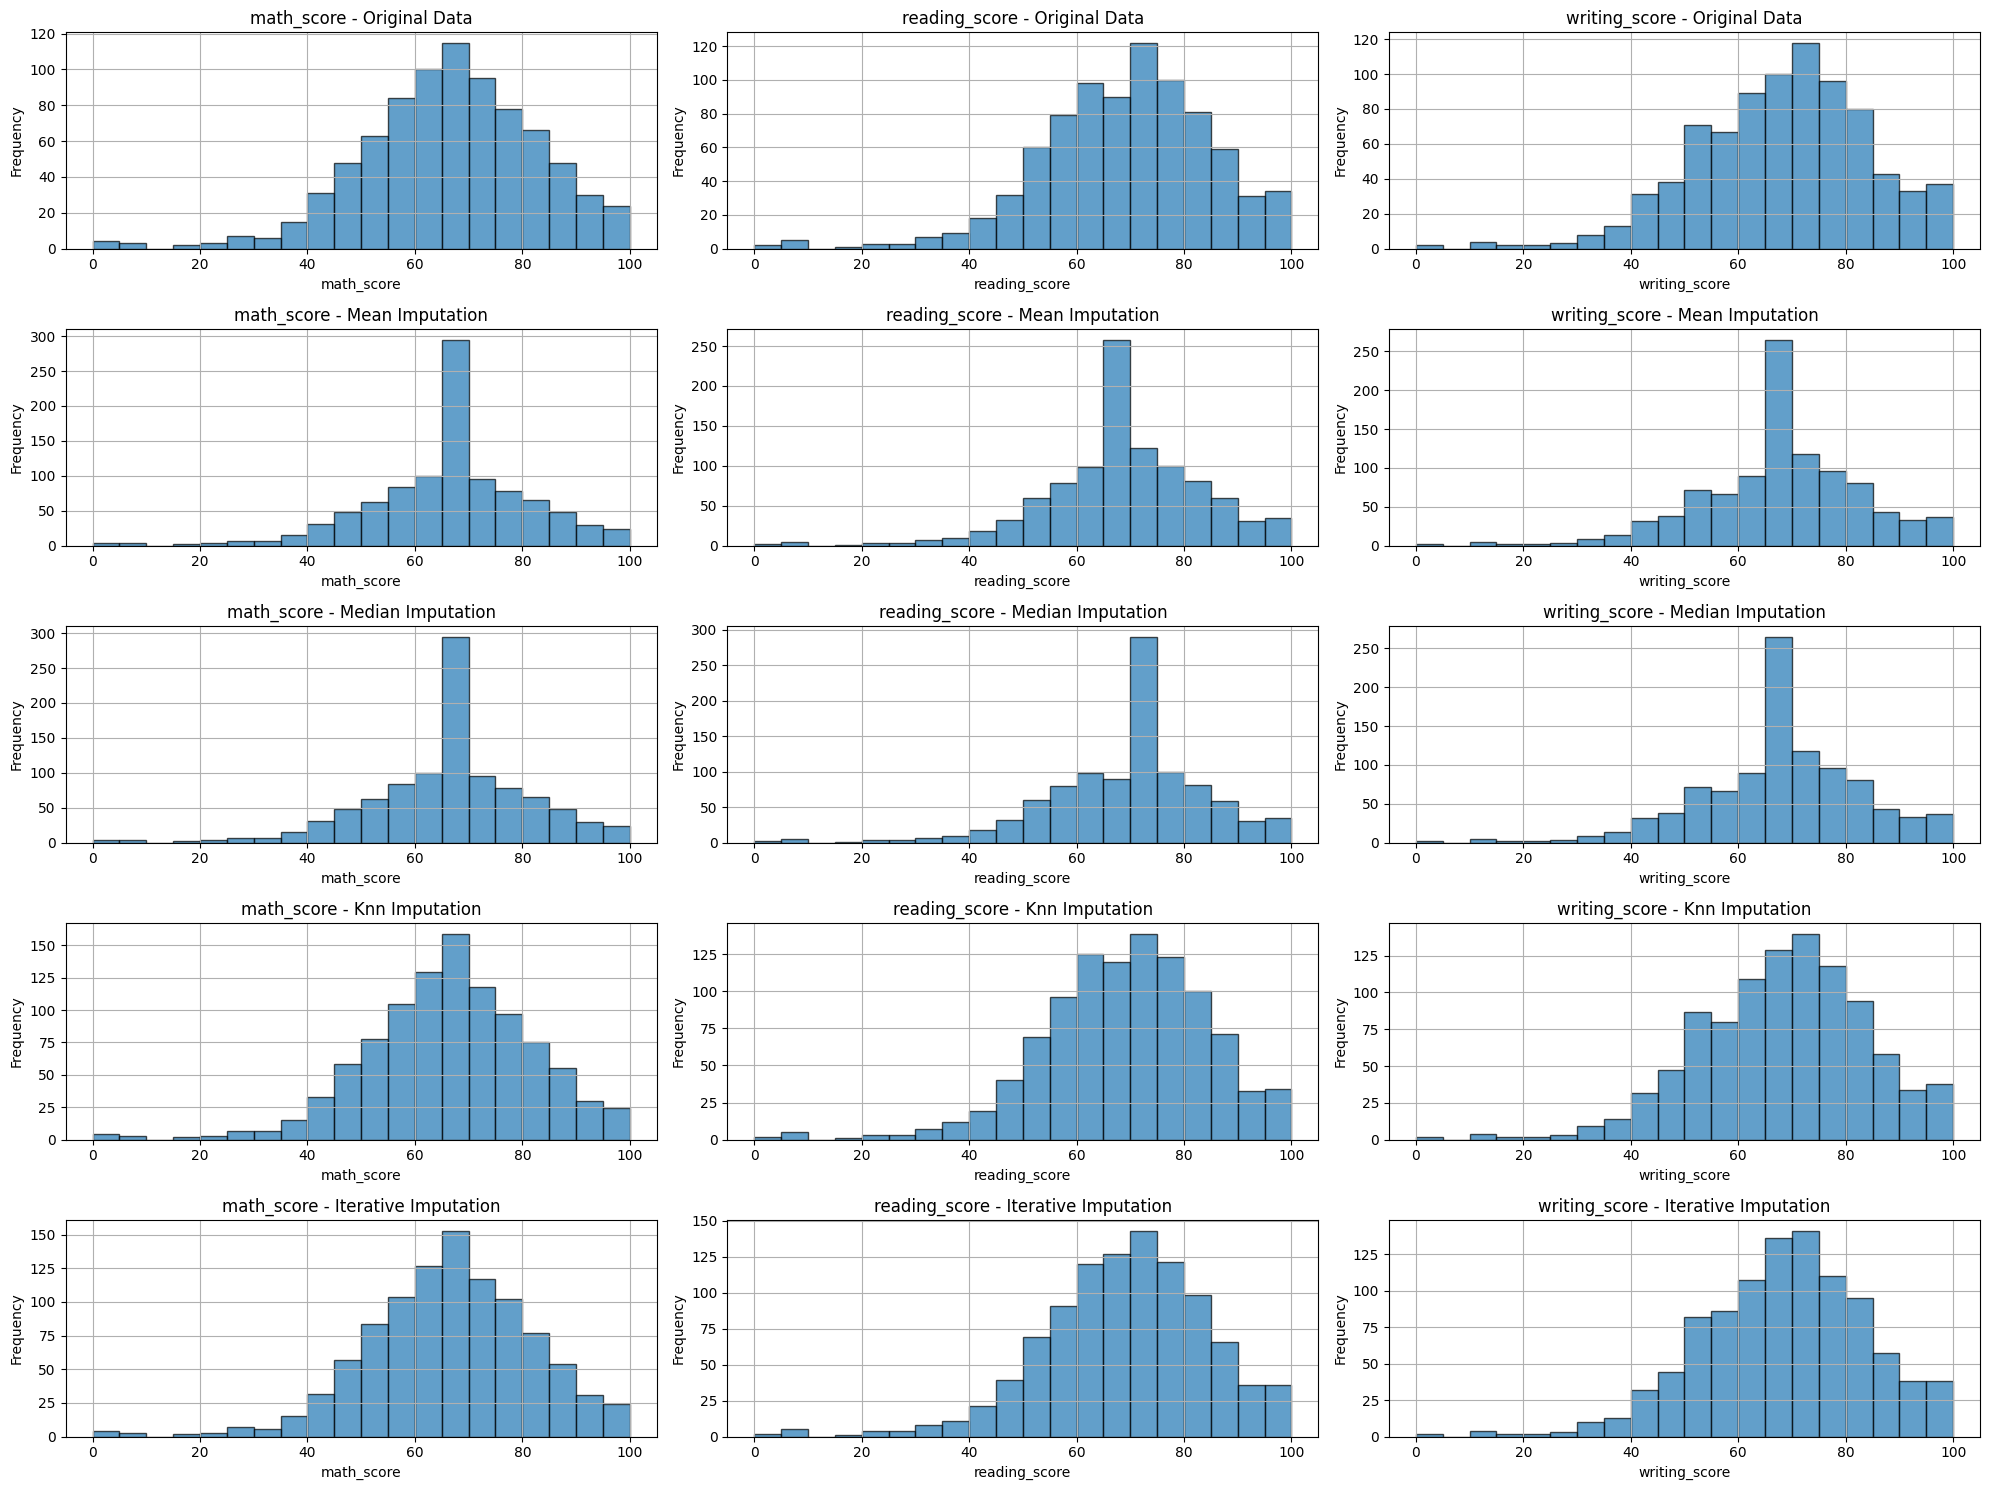


Imputation Strategy Comparison:
--------------------------------------------------

MATH_SCORE:
Original data - Mean: 65.93, Std: 16.35
Mean imputation - Mean: 65.93, Std: 14.80
Median imputation - Mean: 65.95, Std: 14.80
Knn imputation - Mean: 65.91, Std: 15.46
Iterative imputation - Mean: 65.98, Std: 15.43

READING_SCORE:
Original data - Mean: 68.64, Std: 15.81
Mean imputation - Mean: 68.64, Std: 14.42
Median imputation - Mean: 68.87, Std: 14.43
Knn imputation - Mean: 68.65, Std: 15.24
Iterative imputation - Mean: 68.60, Std: 15.37

WRITING_SCORE:
Original data - Mean: 67.67, Std: 16.20
Mean imputation - Mean: 67.67, Std: 14.81
Median imputation - Mean: 67.89, Std: 14.81
Knn imputation - Mean: 67.80, Std: 15.62
Iterative imputation - Mean: 67.89, Std: 15.63

Data shape after handling missing values: (1002, 8)
Missing values after preprocessing:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_pre

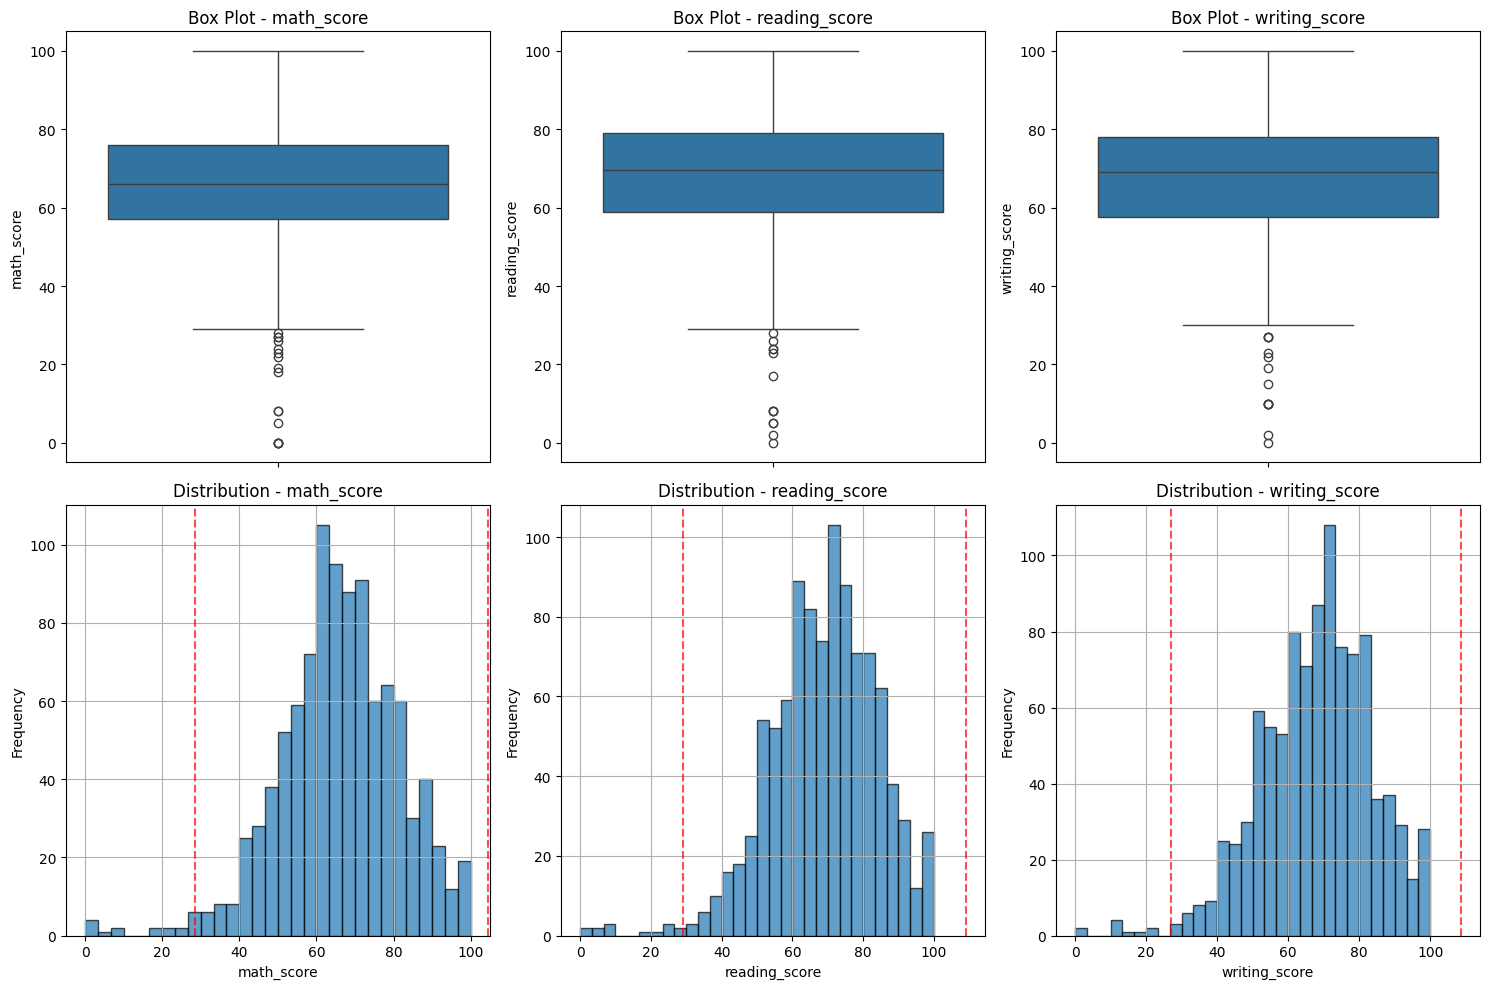


Outlier treatment completed using capping method
Feature engineering completed:
New features added: 7
New columns: ['total_score', 'average_score', 'math_reading_diff', 'math_writing_diff', 'reading_writing_diff', 'math_performance', 'overall_performance']

Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_performance', 'overall_performance', 'math_performance_class']
Numerical columns: ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score', 'math_reading_diff', 'math_writing_diff', 'reading_writing_diff']
Label encoding completed for categorical variables
Scaling methods applied: StandardScaler, MinMaxScaler, RobustScaler


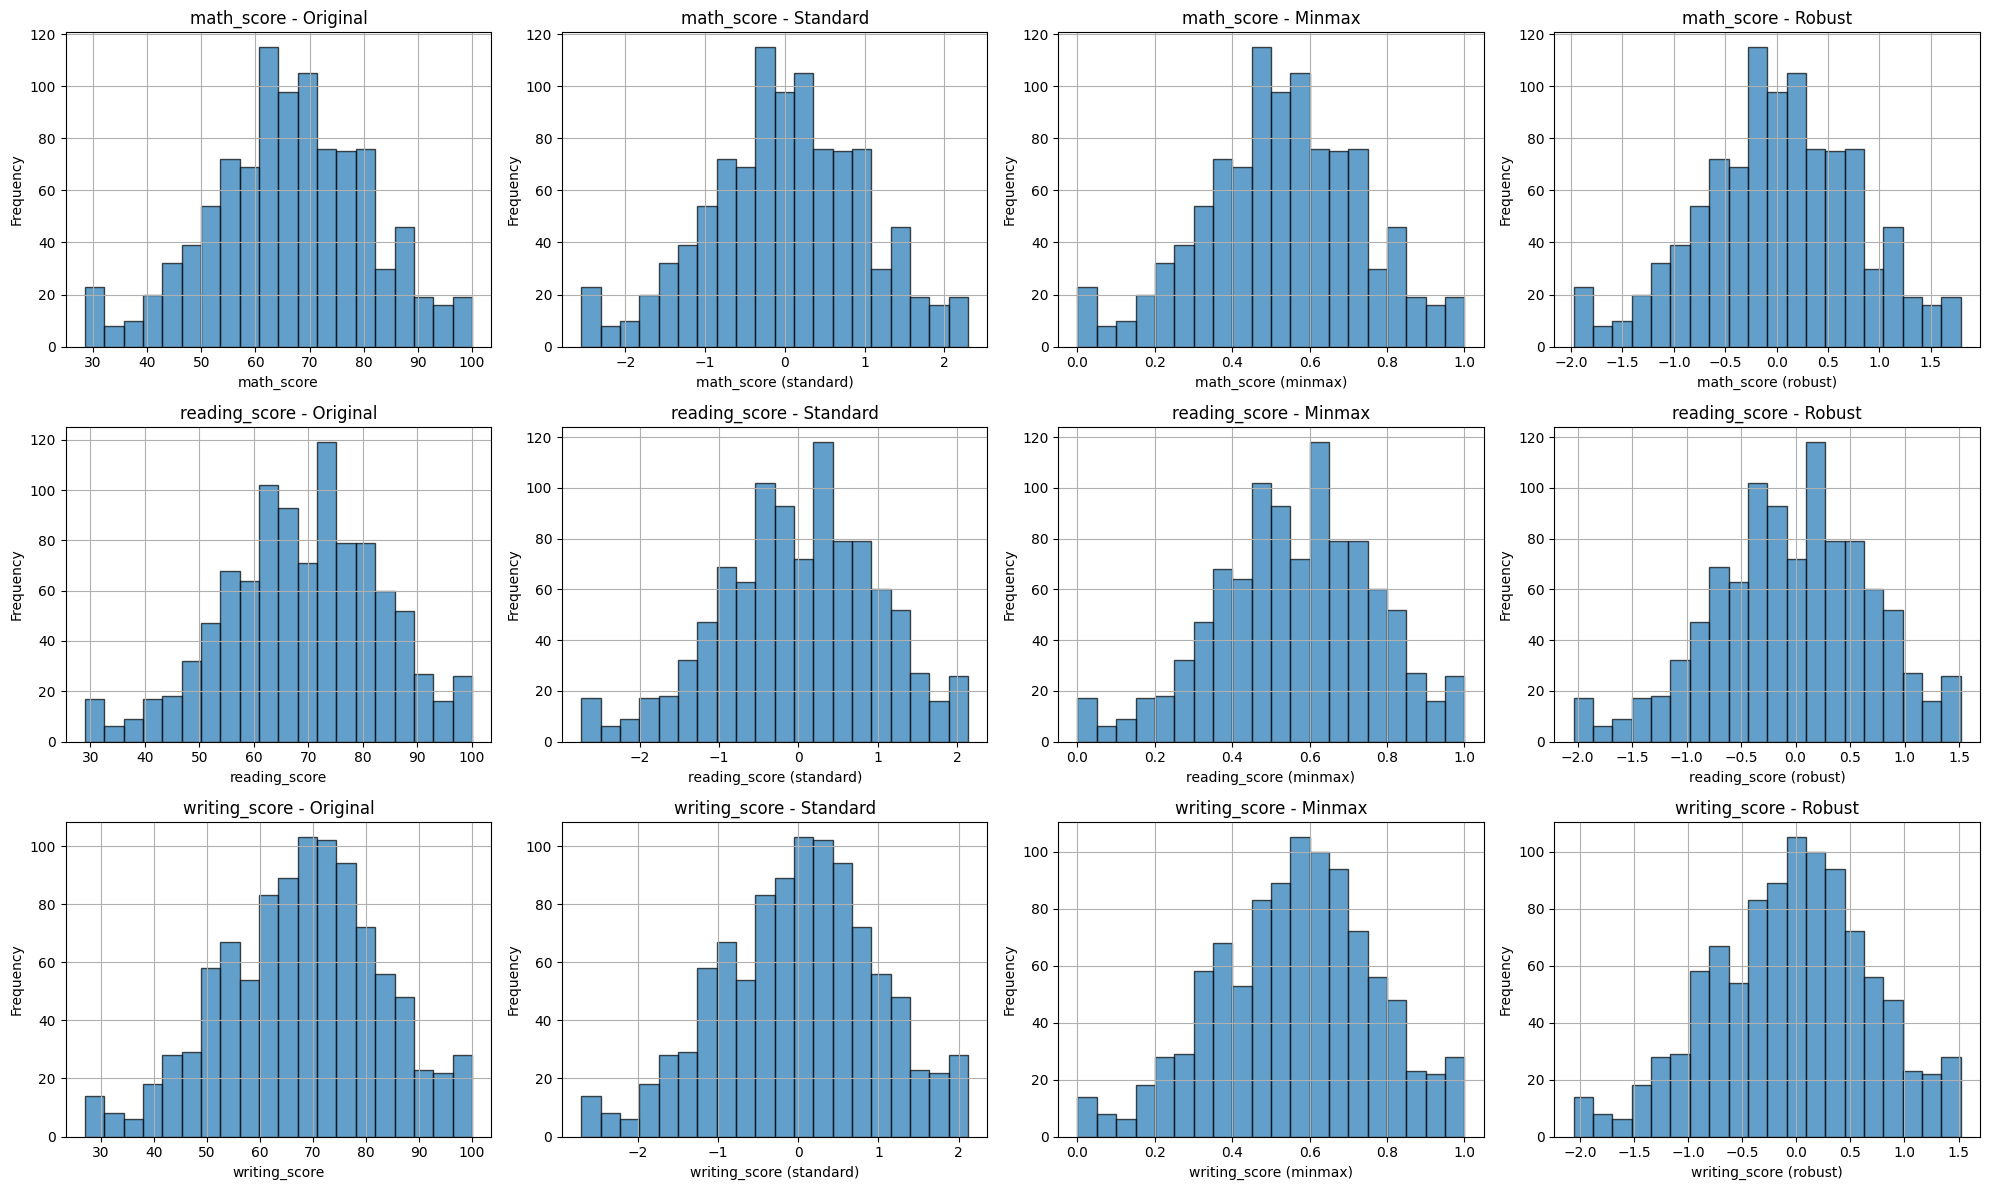


Scaling Methods Comparison:
--------------------------------------------------

MATH_SCORE:
Original - Mean: 66.13, Std: 14.75
Standard - Mean: 0.00, Std: 1.00
Minmax - Mean: 0.53, Std: 0.21
Robust - Mean: 0.01, Std: 0.78

READING_SCORE:
Original - Mean: 68.85, Std: 14.56
Standard - Mean: -0.00, Std: 1.00
Minmax - Mean: 0.56, Std: 0.21
Robust - Mean: -0.04, Std: 0.73

WRITING_SCORE:
Original - Mean: 67.95, Std: 15.13
Standard - Mean: 0.00, Std: 1.00
Minmax - Mean: 0.56, Std: 0.21
Robust - Mean: -0.05, Std: 0.74

Final preprocessed data shape: (1002, 16)
Selected scaling method: standard

Datasets prepared for analysis:
all_features: (1002, 16)
numerical_only: (1002, 8)
categorical_only: (1002, 8)
original_features: (1002, 8)

DATA PREPROCESSING SUMMARY
Original data shape: (1050, 8)
Final data shape: (1002, 16)
Rows removed/modified: 48
Features added: 8

Missing values handled:
- Categorical: Mode imputation
- Numerical: knn imputation

Outliers treated using IQR capping method
Encod

In [20]:
# Data preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Unsupervised learning libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Initial Exploration
# Define performance categories
def categorize_performance(score):
    """Convert continuous math score to performance categories"""
    if score <65:
        return 'Poor'
    # elif score < 70:
    #     return 'Average'
    else:
        return 'Good'
### Load the data
df_raw = pd.read_csv('data_with_faults.csv')
print("Raw Data Shape:", df_raw.shape)
print("\nFirst few rows:")
print(df_raw.head())

### Basic data information
print("\nData Info:")
print(df_raw.info())

print("\nData Description:")
print(df_raw.describe())

### Check for missing values
print("\nMissing Values Count:")
missing_counts = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
print(missing_df)

### Visualize missing data pattern
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(df_raw.isnull(), cbar=True, xticklabels=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
missing_df.plot(x='Column', y='Missing Percentage', kind='bar', ax=plt.gca())
plt.title('Missing Data Percentage by Column')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage (%)')

### Check unique values in categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
numerical_cols = ['math_score', 'reading_score', 'writing_score']

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_vals = df_raw[col].dropna().unique()
    print(f"{col}: {unique_vals}")

### Check for duplicates
print(f"\nDuplicate rows: {df_raw.duplicated().sum()}")

plt.subplot(2, 3, 3)
# Distribution of numerical columns before preprocessing
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, 4 + i)
    df_raw[col].dropna().hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Data Cleaning and Preprocessing

### Create a copy for preprocessing
df_processed = df_raw.copy()

print("Starting data preprocessing...")
print(f"Initial data shape: {df_processed.shape}")

### 2.1 Handle Duplicates
if df_processed.duplicated().sum() > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"Removed {df_raw.shape[0] - df_processed.shape[0]} duplicate rows")

### 2.2 Handle Missing Values in Categorical Columns

# Check missing patterns
print("\nMissing value analysis for categorical variables:")
for col in categorical_cols:
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values ({missing_count/len(df_processed)*100:.2f}%)")

# Strategy for categorical missing values
def handle_categorical_missing(df, column, strategy='mode'):
    """Handle missing values in categorical columns"""
    if strategy == 'mode':
        # Fill with most frequent value
        mode_value = df[column].mode()[0] if len(df[column].mode()) > 0 else 'unknown'
        df[column].fillna(mode_value, inplace=True)
    elif strategy == 'new_category':
        # Create a new category for missing values
        df[column].fillna('missing', inplace=True)
    elif strategy == 'forward_fill':
        # Forward fill
        df[column].fillna(method='ffill', inplace=True)
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill remaining with mode
    return df

# Apply different strategies for different columns
df_processed = handle_categorical_missing(df_processed, 'gender', 'mode')
df_processed = handle_categorical_missing(df_processed, 'race_ethnicity', 'mode')
df_processed = handle_categorical_missing(df_processed, 'parental_level_of_education', 'mode')
df_processed = handle_categorical_missing(df_processed, 'lunch', 'mode')
df_processed = handle_categorical_missing(df_processed, 'test_preparation_course', 'mode')

print("Missing values in categorical columns after preprocessing:")
for col in categorical_cols:
    print(f"{col}: {df_processed[col].isnull().sum()}")

### 2.3 Handle Missing Values in Numerical Columns

print("\nMissing value analysis for numerical variables:")
for col in numerical_cols:
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values ({missing_count/len(df_processed)*100:.2f}%)")

### Try multiple imputation strategies for numerical data
imputation_strategies = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5),
    'iterative': IterativeImputer(random_state=42, max_iter=10)
}

# Create datasets with different imputation strategies
imputed_datasets = {}
numerical_data = df_processed[numerical_cols].copy()

for strategy_name, imputer in imputation_strategies.items():
    try:
        imputed_data = imputer.fit_transform(numerical_data)
        imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols, index=numerical_data.index)
        imputed_datasets[strategy_name] = imputed_df
        print(f"{strategy_name} imputation completed")
    except Exception as e:
        print(f"{strategy_name} imputation failed: {e}")

### Compare imputation strategies
plt.figure(figsize=(20, 15))

# Calculate the number of rows needed
n_methods = len(imputed_datasets)
n_cols = len(numerical_cols)
n_rows = n_methods + 1  # +1 for original data

plot_index = 1

for i, col in enumerate(numerical_cols):
    # Plot original data
    plt.subplot(n_rows, n_cols, plot_index)
    df_processed[col].dropna().hist(bins=20, alpha=0.7, label='Original', edgecolor='black')
    plt.title(f'{col} - Original Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plot_index += 1

# Plot imputation methods for each column
for method, data in imputed_datasets.items():
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, plot_index)
        data[col].hist(bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{col} - {method.title()} Imputation')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot_index += 1

plt.tight_layout()
plt.show()

# Also create a comparison summary
print("\nImputation Strategy Comparison:")
print("-" * 50)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"Original data - Mean: {df_processed[col].mean():.2f}, Std: {df_processed[col].std():.2f}")
    
    for method, data in imputed_datasets.items():
        mean_val = data[col].mean()
        std_val = data[col].std()
        print(f"{method.title()} imputation - Mean: {mean_val:.2f}, Std: {std_val:.2f}")

### Choose best imputation strategy (KNN for this example)
best_strategy = 'knn'  # You can change this based on your analysis
df_numerical_imputed = imputed_datasets[best_strategy]

# Combine categorical and numerical data
df_processed = df_processed[categorical_cols].copy()
for col in numerical_cols:
    df_processed[col] = df_numerical_imputed[col]

print(f"\nData shape after handling missing values: {df_processed.shape}")
print("Missing values after preprocessing:")
print(df_processed.isnull().sum())

### 2.4 Outlier Detection and Treatment

def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_dict[col] = {
            'outlier_indices': outliers,
            'count': len(outliers),
            'percentage': len(outliers) / len(df) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return outliers_dict

# Detect outliers in numerical columns
outliers_info = detect_outliers_iqr(df_processed, numerical_cols)

print("\nOutlier Analysis (IQR Method):")
for col, info in outliers_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")
    print(f"  Range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")

### Visualize outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    # Box plot
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box Plot - {col}')
    
    # Histogram with outliers marked
    plt.subplot(2, 3, i + 4)
    df_processed[col].hist(bins=30, alpha=0.7, edgecolor='black')
    outlier_indices = outliers_info[col]['outlier_indices']
    if len(outlier_indices) > 0:
        outlier_values = df_processed.loc[outlier_indices, col]
        plt.axvline(outliers_info[col]['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Outlier Bounds')
        plt.axvline(outliers_info[col]['upper_bound'], color='red', linestyle='--', alpha=0.7)
    plt.title(f'Distribution - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Handle outliers (using capping method)
def cap_outliers(df, columns, method='iqr', factor=1.5):
    """Cap outliers using IQR method"""
    df_capped = df.copy()
    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
        elif method == 'percentile':
            lower_bound = df[col].quantile(0.05)
            upper_bound = df[col].quantile(0.95)
        
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Apply outlier capping
df_processed_capped = cap_outliers(df_processed, numerical_cols)

print("\nOutlier treatment completed using capping method")

### 2.5 Feature Engineering

# Create additional features
df_processed_capped['total_score'] = (df_processed_capped['math_score'] + 
                                      df_processed_capped['reading_score'] + 
                                      df_processed_capped['writing_score'])

df_processed_capped['average_score'] = df_processed_capped['total_score'] / 3

# Create score difference features
df_processed_capped['math_reading_diff'] = df_processed_capped['math_score'] - df_processed_capped['reading_score']
df_processed_capped['math_writing_diff'] = df_processed_capped['math_score'] - df_processed_capped['writing_score']
df_processed_capped['reading_writing_diff'] = df_processed_capped['reading_score'] - df_processed_capped['writing_score']

# Create categorical features based on scores
df_processed_capped['math_performance'] = pd.cut(df_processed_capped['math_score'], 
                                                bins=[0, 50, 70, 85, 100], 
                                                labels=['Poor', 'Average', 'Good', 'Excellent'])

df_processed_capped['overall_performance'] = pd.cut(df_processed_capped['average_score'], 
                                                   bins=[0, 50, 70, 85, 100], 
                                                   labels=['Poor', 'Average', 'Good', 'Excellent'])

print("Feature engineering completed:")
print(f"New features added: {df_processed_capped.shape[1] - df_processed.shape[1]}")
print("New columns:", list(df_processed_capped.columns[df_processed.shape[1]:]))
df_processed_capped['math_performance_class'] = df_processed_capped['math_score'].apply(categorize_performance)
### 2.6 Encoding Categorical Variables

# Separate categorical and numerical columns for the processed data
categorical_cols_extended = categorical_cols + ['math_performance', 'overall_performance', 'math_performance_class']
numerical_cols_extended = numerical_cols + ['total_score', 'average_score', 'math_reading_diff', 
                                           'math_writing_diff', 'reading_writing_diff']

print(f"\nCategorical columns: {categorical_cols_extended}")
print(f"Numerical columns: {numerical_cols_extended}")
print("Label encoding completed for categorical variables")

# Label encoding for categorical variables
label_encoders = {}
df_encoded = df_processed_capped.copy()

for col in categorical_cols_extended:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


### 2.7 Feature Scaling

# Prepare different scaling methods
scaling_methods = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

scaled_datasets = {}

for method_name, scaler in scaling_methods.items():
    scaled_data = scaler.fit_transform(df_encoded[numerical_cols_extended])
    scaled_df = df_encoded.copy()
    scaled_df[numerical_cols_extended] = scaled_data
    scaled_datasets[method_name] = {
        'data': scaled_df,
        'scaler': scaler
    }

print("Scaling methods applied: StandardScaler, MinMaxScaler, RobustScaler")

n_scaling_methods = len(scaling_methods)
n_numerical_cols = len(numerical_cols)

plt.figure(figsize=(20, 12))

plot_index = 1

for i, col in enumerate(numerical_cols):
    # Original data
    plt.subplot(n_numerical_cols, n_scaling_methods + 1, plot_index)
    df_encoded[col].hist(bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{col} - Original')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plot_index += 1
    
    # Scaled versions
    for j, (method, dataset) in enumerate(scaled_datasets.items()):
        plt.subplot(n_numerical_cols, n_scaling_methods + 1, plot_index)
        dataset['data'][col].hist(bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{col} - {method.title()}')
        plt.xlabel(f'{col} ({method})')
        plt.ylabel('Frequency')
        plot_index += 1

plt.tight_layout()
plt.show()

# Print scaling statistics
print("\nScaling Methods Comparison:")
print("-" * 50)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"Original - Mean: {df_encoded[col].mean():.2f}, Std: {df_encoded[col].std():.2f}")
    
    for method, dataset in scaled_datasets.items():
        mean_val = dataset['data'][col].mean()
        std_val = dataset['data'][col].std()
        print(f"{method.title()} - Mean: {mean_val:.2f}, Std: {std_val:.2f}")

### 2.8 Final Data Preparation for Unsupervised Learning

# Choose the best scaled dataset (StandardScaler for this example)
best_scaling = 'standard'
df_final = scaled_datasets[best_scaling]['data'].copy()
final_scaler = scaled_datasets[best_scaling]['scaler']

print(f"\nFinal preprocessed data shape: {df_final.shape}")
print(f"Selected scaling method: {best_scaling}")

# Create different datasets for different unsupervised learning tasks
datasets_for_analysis = {
    'all_features': df_final,
    'numerical_only': df_final[numerical_cols_extended],
    'categorical_only': df_final[categorical_cols_extended],
    'original_features': df_final[categorical_cols + numerical_cols]
}

print("\nDatasets prepared for analysis:")
for name, data in datasets_for_analysis.items():
    print(f"{name}: {data.shape}")

### Data Quality Report
print("\n" + "="*60)
print("DATA PREPROCESSING SUMMARY")
print("="*60)

print(f"Original data shape: {df_raw.shape}")
print(f"Final data shape: {df_final.shape}")
print(f"Rows removed/modified: {df_raw.shape[0] - df_final.shape[0]}")
print(f"Features added: {df_final.shape[1] - df_raw.shape[1]}")

print(f"\nMissing values handled:")
print(f"- Categorical: Mode imputation")
print(f"- Numerical: {best_strategy} imputation")

print(f"\nOutliers treated using IQR capping method")
print(f"Encoding: Label encoding for categorical variables")
print(f"Scaling: {best_scaling} scaling for numerical variables")

print(f"\nFinal data quality check:")
print(f"- Missing values: {df_final.isnull().sum().sum()}")
print(f"- Duplicates: {df_final.duplicated().sum()}")
print(f"- Data types consistent: {len(df_final.select_dtypes(include=[np.number]).columns) == df_final.shape[1]}")

## 3. Unsupervised Learning (Using Preprocessed Data)

### Use the best preprocessed dataset for unsupervised learning
df_unsupervised = datasets_for_analysis['all_features']
print(f"Using dataset for unsupervised learning: {df_unsupervised.shape}")


Classification dataset shape: (1002, 14)
Target variable shape: (1002,)

Class Distribution:
                        Count  Percentage
math_performance_class                   
0                         558       55.69
1                         444       44.31


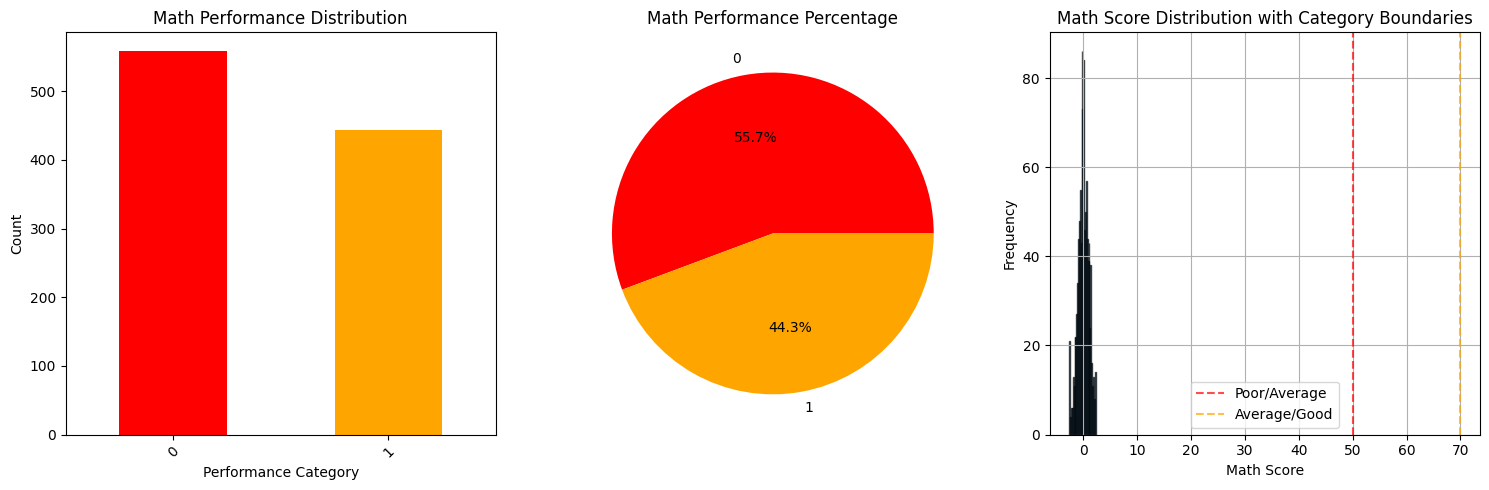


Classification Train set: (801, 14)
Classification Test set: (201, 14)

Train set class distribution:
math_performance_class
0    0.557
1    0.443
Name: proportion, dtype: float64

Test set class distribution:
math_performance_class
0    0.557
1    0.443
Name: proportion, dtype: float64
Training and evaluating classification models...

Training Logistic Regression...

Logistic Regression Results:
----------------------------------------
Training Accuracy: 0.9938
Test Accuracy: 0.9801
Test Precision: 0.9808
Test Recall: 0.9801
Test F1-Score: 0.9800

Training Decision Tree...

Decision Tree Results:
----------------------------------------
Training Accuracy: 1.0000
Test Accuracy: 0.9652
Test Precision: 0.9655
Test Recall: 0.9652
Test F1-Score: 0.9651

Training Random Forest...

Random Forest Results:
----------------------------------------
Training Accuracy: 1.0000
Test Accuracy: 0.9751
Test Precision: 0.9755
Test Recall: 0.9751
Test F1-Score: 0.9751

Training Gradient Boosting...

Gra

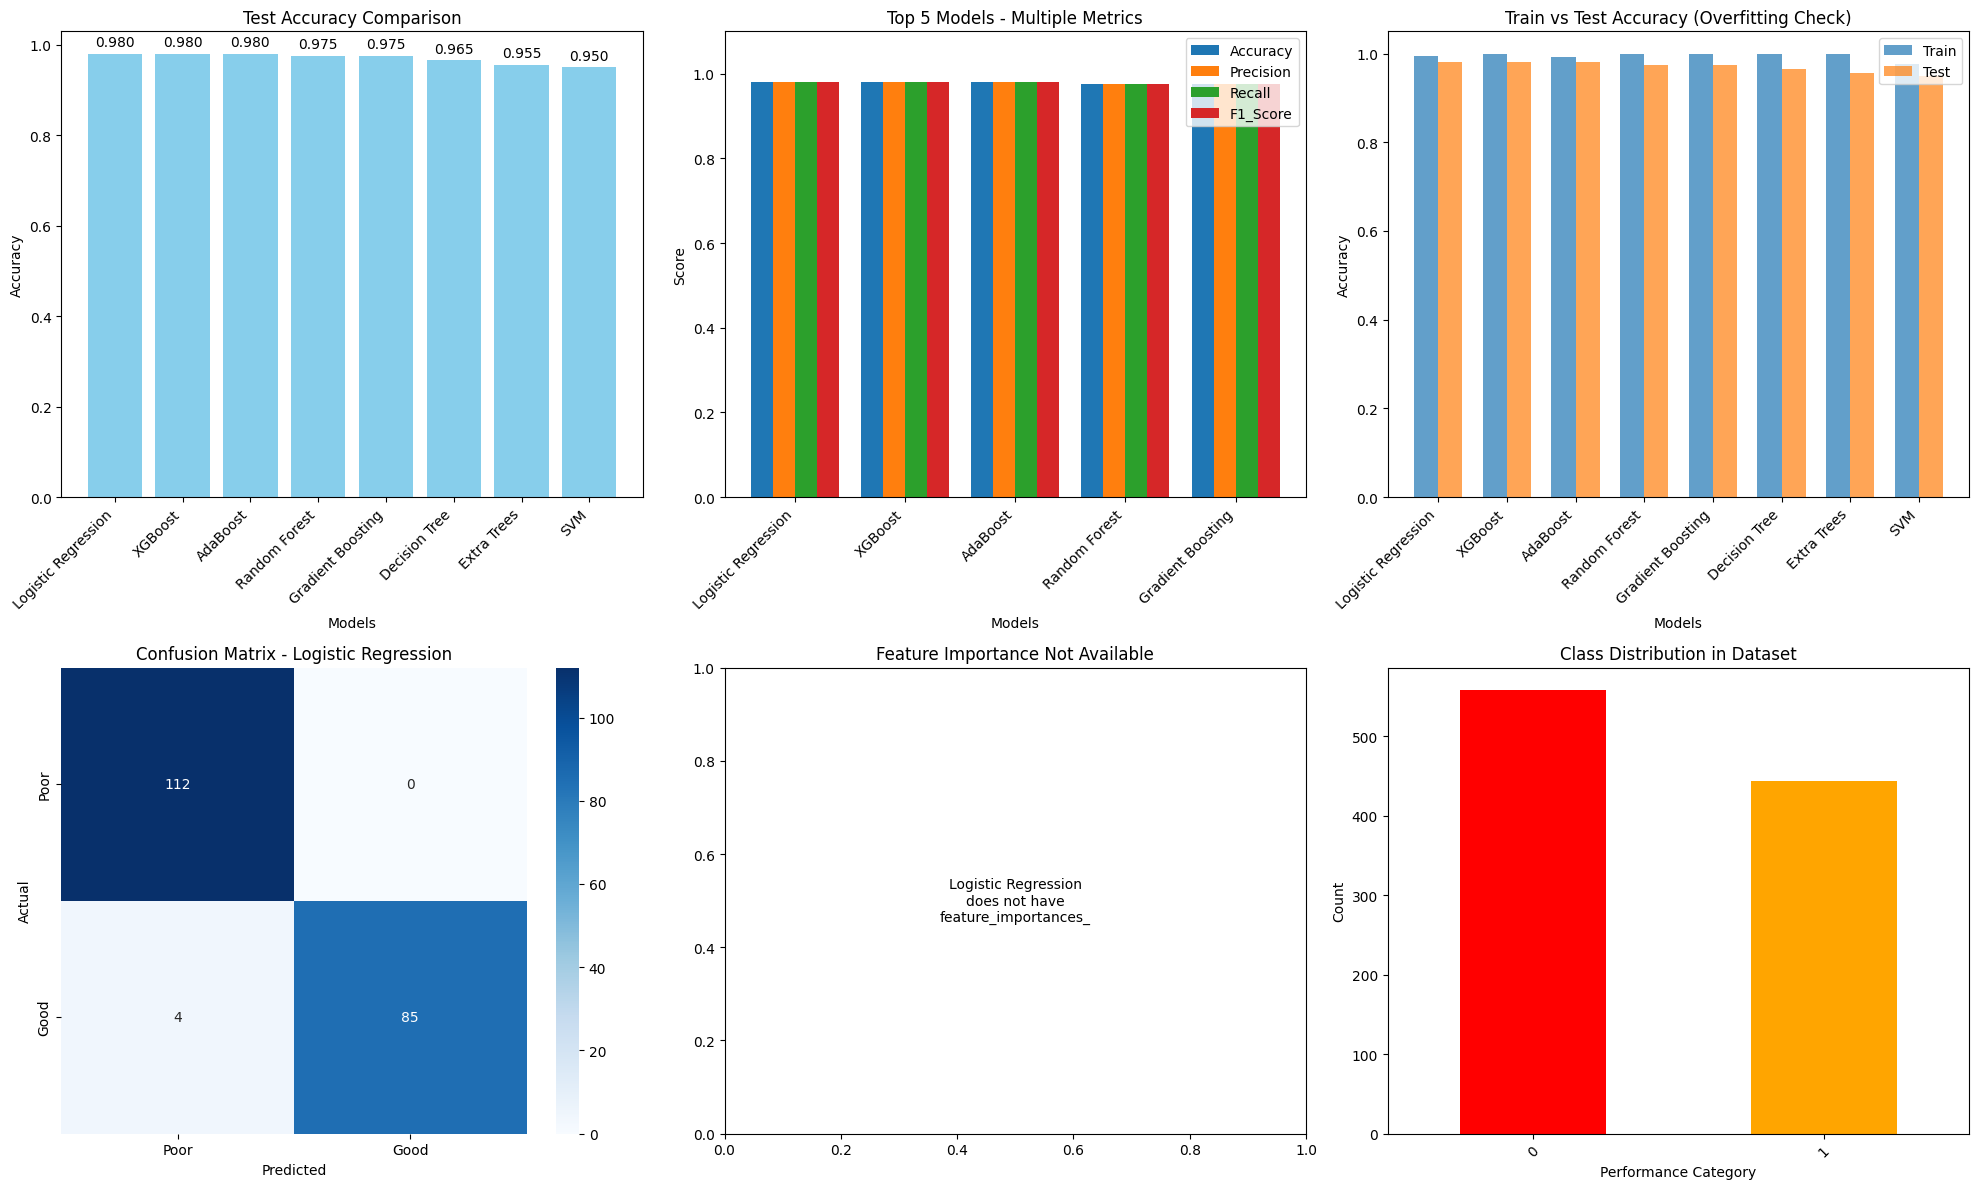


DETAILED ANALYSIS OF BEST MODEL: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       112
           1       1.00      0.96      0.98        89

    accuracy                           0.98       201
   macro avg       0.98      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201


Confusion Matrix:
      Poor  Good
Poor   112     0
Good     4    85

MODEL INSIGHTS AND RECOMMENDATIONS

Class-wise Performance Analysis:

Class Imbalance Analysis:
Imbalance Ratio: 1.26
✓ Class distribution is relatively balanced

Overall Model Performance Summary:
Best Model: Logistic Regression
Test Accuracy: 0.9801
Model Complexity: Low
✓ Excellent performance!

Classification analysis completed!
Best performing model: Logistic Regression
Best test accuracy: 0.9801


In [21]:
## Classification Problem: Math Performance Prediction

### Convert Regression to Classification Problem

# Create classification target based on math_score

df_classification = df_unsupervised.copy()

# Remove the original math_score from features (to avoid data leakage)
X_class = df_classification.drop(columns=['math_score', 'math_performance_class'], axis=1)
y_class = df_classification['math_performance_class']

print(f"Classification dataset shape: {X_class.shape}")
print(f"Target variable shape: {y_class.shape}")

# Check class distribution
print("\nClass Distribution:")
class_counts = y_class.value_counts()
class_percentages = y_class.value_counts(normalize=True) * 100
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})
print(class_distribution)

### Visualize class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
y_class.value_counts().plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
plt.title('Math Performance Distribution')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
y_class.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                         colors=['red', 'orange', 'green', 'blue'])
plt.title('Math Performance Percentage')
plt.ylabel('')

plt.subplot(1, 3, 3)
# Show original math score distribution with category boundaries
df_classification['math_score'].hist(bins=30, alpha=0.7, edgecolor='black')
plt.axvline(50, color='red', linestyle='--', alpha=0.7, label='Poor/Average')
plt.axvline(70, color='orange', linestyle='--', alpha=0.7, label='Average/Good')
# plt.axvline(85, color='green', linestyle='--', alpha=0.7, label='Good/Excellent')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution with Category Boundaries')
plt.legend()

plt.tight_layout()
plt.show()

### Split data for classification
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"\nClassification Train set: {X_train_class.shape}")
print(f"Classification Test set: {X_test_class.shape}")

# Check if stratification worked
print("\nTrain set class distribution:")
print(y_train_class.value_counts(normalize=True).round(3))
print("\nTest set class distribution:")
print(y_test_class.value_counts(normalize=True).round(3))

### Import Classification Models and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Classification metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_auc_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

### Create Evaluation Function for Classification
def evaluate_classification_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """Comprehensive evaluation of classification model"""
    
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Multi-class AUC (if probabilities available)
    try:
        if y_pred_proba is not None:
            # Encode labels for AUC calculation
            le = LabelEncoder()
            y_true_encoded = le.fit_transform(y_true)
            auc = roc_auc_score(y_true_encoded, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            auc = None
    except:
        auc = None
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'AUC': auc
    }

### Define Classification Models
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42, probability=True)
}

### Train and Evaluate All Classification Models
print("Training and evaluating classification models...")
print("="*80)

classification_results = []

for model_name, model in classification_models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train_class, y_train_class)
    
    # Make predictions
    y_train_pred = model.predict(X_train_class)
    y_test_pred = model.predict(X_test_class)
    
    # Get prediction probabilities (if available)
    try:
        y_test_pred_proba = model.predict_proba(X_test_class)
    except:
        y_test_pred_proba = None
    
    # Evaluate on training set
    train_results = evaluate_classification_model(y_train_class, y_train_pred, 
                                                  model_name=f"{model_name} (Train)")
    
    # Evaluate on test set
    test_results = evaluate_classification_model(y_test_class, y_test_pred, y_test_pred_proba,
                                                 model_name=f"{model_name} (Test)")
    
    classification_results.append(train_results)
    classification_results.append(test_results)
    
    # Print results
    print(f"\n{model_name} Results:")
    print("-" * 40)
    print(f"Training Accuracy: {train_results['Accuracy']:.4f}")
    print(f"Test Accuracy: {test_results['Accuracy']:.4f}")
    print(f"Test Precision: {test_results['Precision']:.4f}")
    print(f"Test Recall: {test_results['Recall']:.4f}")
    print(f"Test F1-Score: {test_results['F1_Score']:.4f}")
    if test_results['AUC']:
        print(f"Test AUC: {test_results['AUC']:.4f}")

### Create Results Summary
results_df = pd.DataFrame(classification_results)

# Separate train and test results
train_results_df = results_df[results_df['Model'].str.contains('Train')].copy()
test_results_df = results_df[results_df['Model'].str.contains('Test')].copy()

# Clean model names
train_results_df['Model'] = train_results_df['Model'].str.replace(' (Train)', '')
test_results_df['Model'] = test_results_df['Model'].str.replace(' (Test)', '')

# Sort by test accuracy
test_results_df = test_results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("CLASSIFICATION MODELS PERFORMANCE SUMMARY")
print("="*80)

print("\nTop 5 Models by Test Accuracy:")
print(test_results_df.head()[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']].round(4))

### Visualize Model Comparison
plt.figure(figsize=(20, 12))

# Plot 1: Accuracy comparison
plt.subplot(2, 3, 1)
models_for_plot = test_results_df['Model'].head(8)  # Top 8 models
accuracies = test_results_df['Accuracy'].head(8)
bars = plt.bar(range(len(models_for_plot)), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison')
plt.xticks(range(len(models_for_plot)), models_for_plot, rotation=45, ha='right')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Plot 2: Multiple metrics comparison for top 5 models
plt.subplot(2, 3, 2)
top_5_models = test_results_df.head(5)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
x = np.arange(len(top_5_models))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, top_5_models[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Top 5 Models - Multiple Metrics')
plt.xticks(x + width*1.5, top_5_models['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.1)

# Plot 3: Train vs Test Accuracy (checking for overfitting)
plt.subplot(2, 3, 3)
train_acc = train_results_df.set_index('Model')['Accuracy']
test_acc = test_results_df.set_index('Model')['Accuracy']

models_subset = test_results_df['Model'].head(8)
train_subset = [train_acc[model] for model in models_subset]
test_subset = [test_acc[model] for model in models_subset]

x = np.arange(len(models_subset))
width = 0.35

plt.bar(x - width/2, train_subset, width, label='Train', alpha=0.7)
plt.bar(x + width/2, test_subset, width, label='Test', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Overfitting Check)')
plt.xticks(x, models_subset, rotation=45, ha='right')
plt.legend()

# Plot 4: Confusion Matrix for Best Model
best_model_name = test_results_df.iloc[0]['Model']
best_model = classification_models[best_model_name]
y_pred_best = best_model.predict(X_test_class)

plt.subplot(2, 3, 4)
cm = confusion_matrix(y_test_class, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Poor', 'Good'],
           yticklabels=['Poor', 'Good'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 5: Feature Importance (for tree-based models)
plt.subplot(2, 3, 5)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_class.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    plt.barh(range(len(feature_importance)), feature_importance['importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
else:
    plt.text(0.5, 0.5, f'{best_model_name}\ndoes not have\nfeature_importances_', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance Not Available')

# Plot 6: Class distribution
plt.subplot(2, 3, 6)
y_class.value_counts().plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
plt.title('Class Distribution in Dataset')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Detailed Classification Report for Best Model
print(f"\n{'='*80}")
print(f"DETAILED ANALYSIS OF BEST MODEL: {best_model_name}")
print(f"{'='*80}")

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_best))

print("\nConfusion Matrix:")
cm_df = pd.DataFrame(cm, 
                     index=['Poor', 'Good'],
                     columns=['Poor', 'Good'])
print(cm_df)

### Model Insights and Recommendations
print(f"\n{'='*80}")
print("MODEL INSIGHTS AND RECOMMENDATIONS")
print(f"{'='*80}")

# Calculate class-wise performance
class_performance = classification_report(y_test_class, y_pred_best, output_dict=True)

print(f"\nClass-wise Performance Analysis:")
for class_name in ['Poor', 'Good']:
    if class_name in class_performance:
        precision = class_performance[class_name]['precision']
        recall = class_performance[class_name]['recall']
        f1 = class_performance[class_name]['f1-score']
        support = class_performance[class_name]['support']
        
        print(f"\n{class_name} Performance:")
        print(f"  - Precision: {precision:.3f} (of predicted {class_name}, {precision:.1%} were correct)")
        print(f"  - Recall: {recall:.3f} (of actual {class_name}, {recall:.1%} were identified)")
        print(f"  - F1-Score: {f1:.3f} (harmonic mean of precision and recall)")
        print(f"  - Support: {support} (number of actual instances)")

# Check for class imbalance issues
print(f"\nClass Imbalance Analysis:")
class_ratios = y_class.value_counts(normalize=True)
max_ratio = class_ratios.max()
min_ratio = class_ratios.min()
imbalance_ratio = max_ratio / min_ratio

print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected!")
    print("Recommendations:")
    print("- Consider using class weights in models")
    print("- Use stratified sampling")
    print("- Consider SMOTE for oversampling minority classes")
else:
    print("✓ Class distribution is relatively balanced")

print(f"\nOverall Model Performance Summary:")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {test_results_df.iloc[0]['Accuracy']:.4f}")
print(f"Model Complexity: {'High' if 'Forest' in best_model_name or 'XGBoost' in best_model_name else 'Medium' if 'Tree' in best_model_name else 'Low'}")

if test_results_df.iloc[0]['Accuracy'] > 0.85:
    print("✓ Excellent performance!")
elif test_results_df.iloc[0]['Accuracy'] > 0.75:
    print("✓ Good performance!")
elif test_results_df.iloc[0]['Accuracy'] > 0.65:
    print("⚠️  Moderate performance - consider feature engineering")
else:
    print("❌ Poor performance - data quality or more complex modeling needed")

### Save Results
classification_summary = {
    'best_model': best_model_name,
    'test_accuracy': test_results_df.iloc[0]['Accuracy'],
    'all_results': test_results_df,
    'class_distribution': y_class.value_counts(),
    'confusion_matrix': cm
}

print(f"\nClassification analysis completed!")
print(f"Best performing model: {best_model_name}")
print(f"Best test accuracy: {test_results_df.iloc[0]['Accuracy']:.4f}")

Data shape: (1002, 15)
Data info:
<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1002 non-null   int64  
 1   race_ethnicity               1002 non-null   int64  
 2   parental_level_of_education  1002 non-null   int64  
 3   lunch                        1002 non-null   int64  
 4   test_preparation_course      1002 non-null   int64  
 5   math_score                   1002 non-null   float64
 6   reading_score                1002 non-null   float64
 7   writing_score                1002 non-null   float64
 8   total_score                  1002 non-null   float64
 9   average_score                1002 non-null   float64
 10  math_reading_diff            1002 non-null   float64
 11  math_writing_diff            1002 non-null   float64
 12  reading_writing_diff         1002 non-null   fl

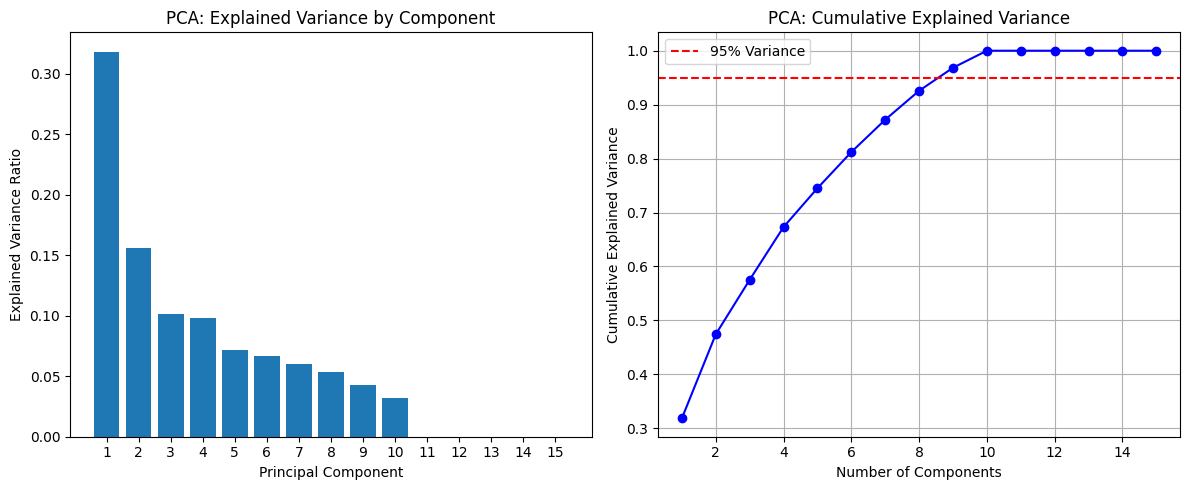

Explained variance with 3 components: 0.5752
Optimal number of clusters based on silhouette score: 3
Silhouette Score for 3 clusters: 0.2126


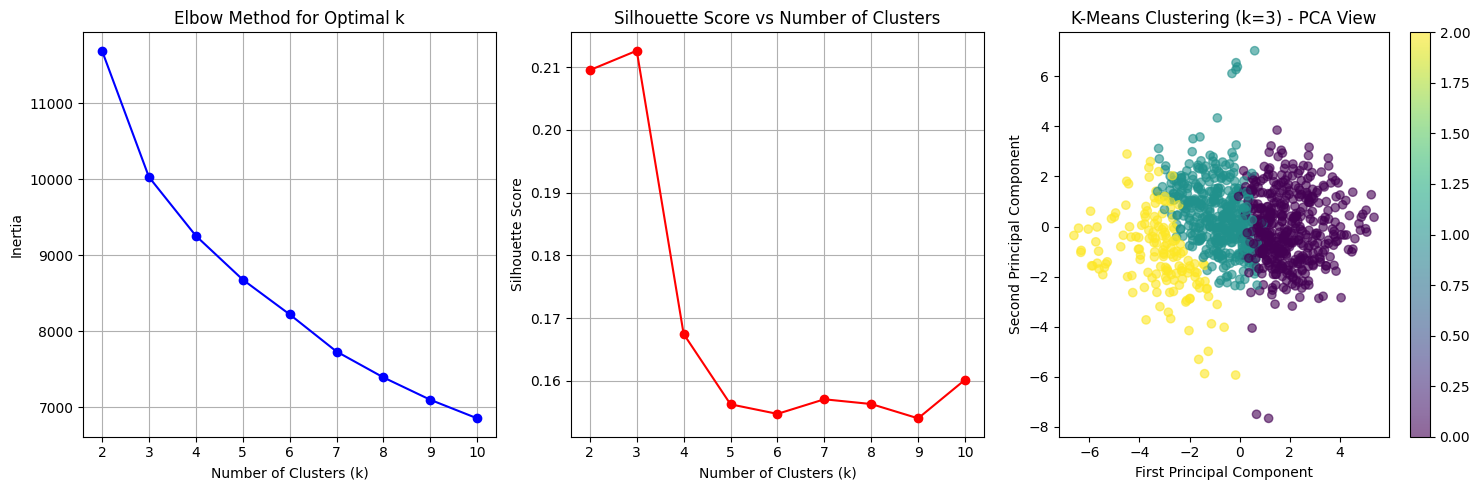


Cluster Analysis:
        math_score             reading_score       writing_score      
              mean   std count          mean   std          mean   std
Cluster                                                               
0             0.78  0.66   443          0.84  0.57          0.85  0.56
1            -0.25  0.50   402         -0.42  0.53         -0.42  0.56
2            -1.56  0.50   157         -1.31  0.77         -1.31  0.69

Categorical Variables by Cluster:

gender:
gender       0      1
Cluster              
0        0.661  0.339
1        0.537  0.463
2        0.643  0.357

race_ethnicity:
race_ethnicity      0      1      2      3      4
Cluster                                          
0               0.050  0.135  0.422  0.233  0.160
1               0.077  0.172  0.453  0.204  0.095
2               0.127  0.166  0.471  0.172  0.064

parental_level_of_education:
parental_level_of_education      0      1      2      3      4      5
Cluster                           

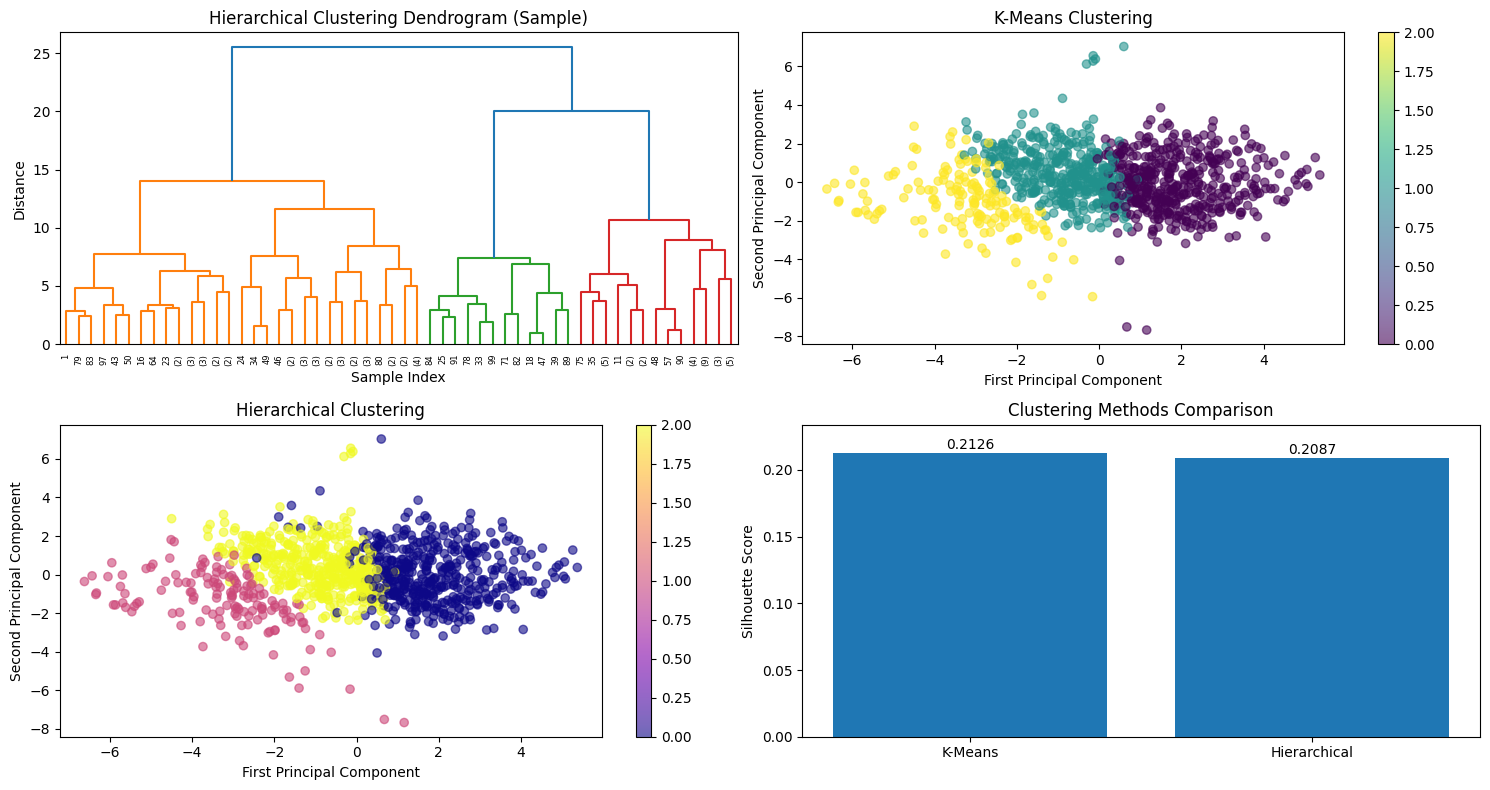

DBSCAN Results:
eps=0.5: 0 clusters, 1002 noise points, silhouette=-1.0000
eps=1.0: 10 clusters, 883 noise points, silhouette=-0.2888
eps=1.5: 27 clusters, 421 noise points, silhouette=-0.0584
eps=2.0: 19 clusters, 182 noise points, silhouette=0.0214

Best eps: 2.0


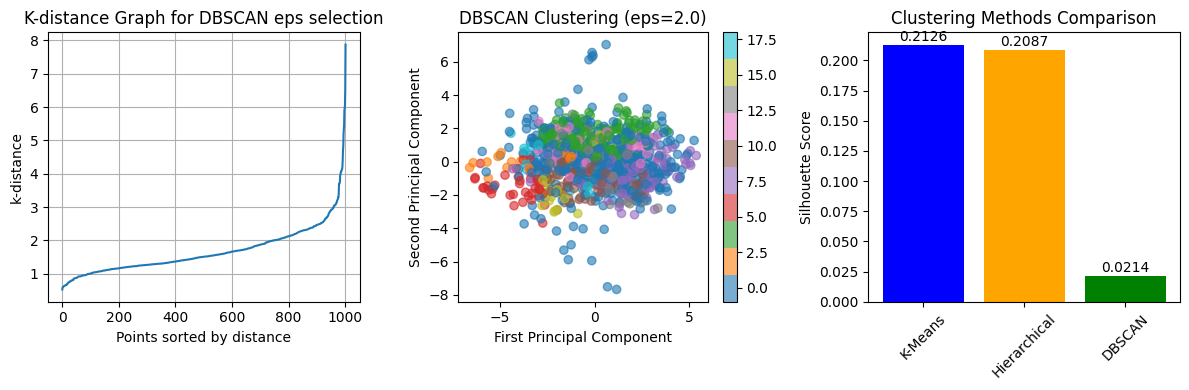

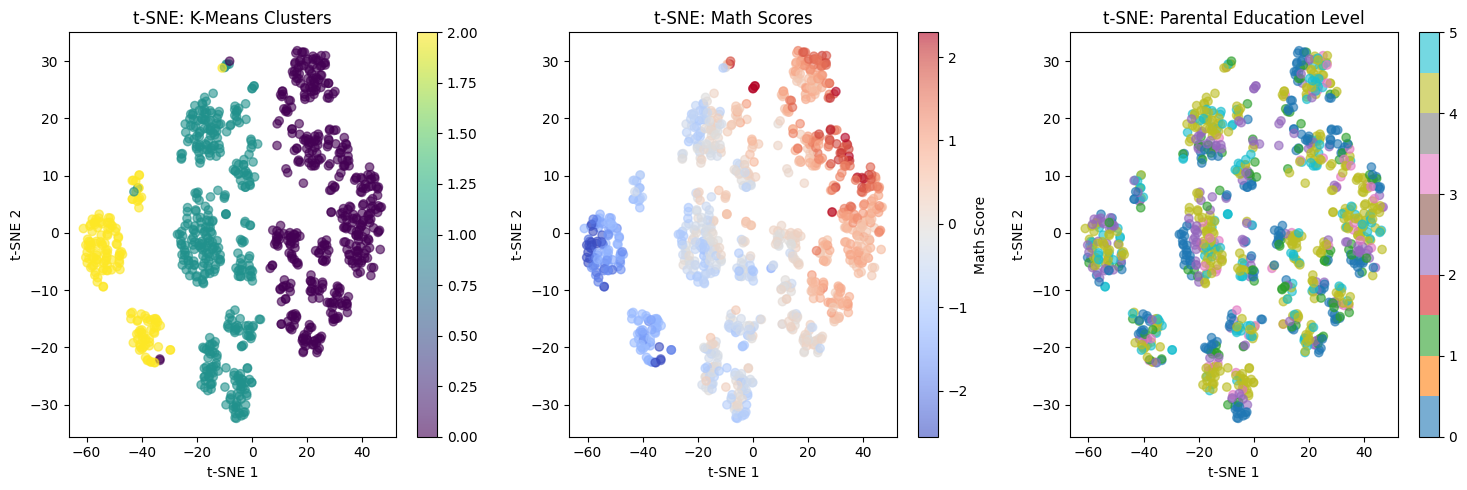

Association Rules Data Shape: (1002, 14)
Sample of association data:
   gender  race_ethnicity  parental_level_of_education  lunch  \
0       0               2                            4      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       0               2                            4      1   

   test_preparation_course  math_score_category_Low  \
0                        1                     True   
1                        1                     True   
2                        1                     True   
3                        1                    False   
4                        1                     True   

   math_score_category_Medium  math_score_category_High  \
0                       False                     False   
1                       False                     False   
2                       False   

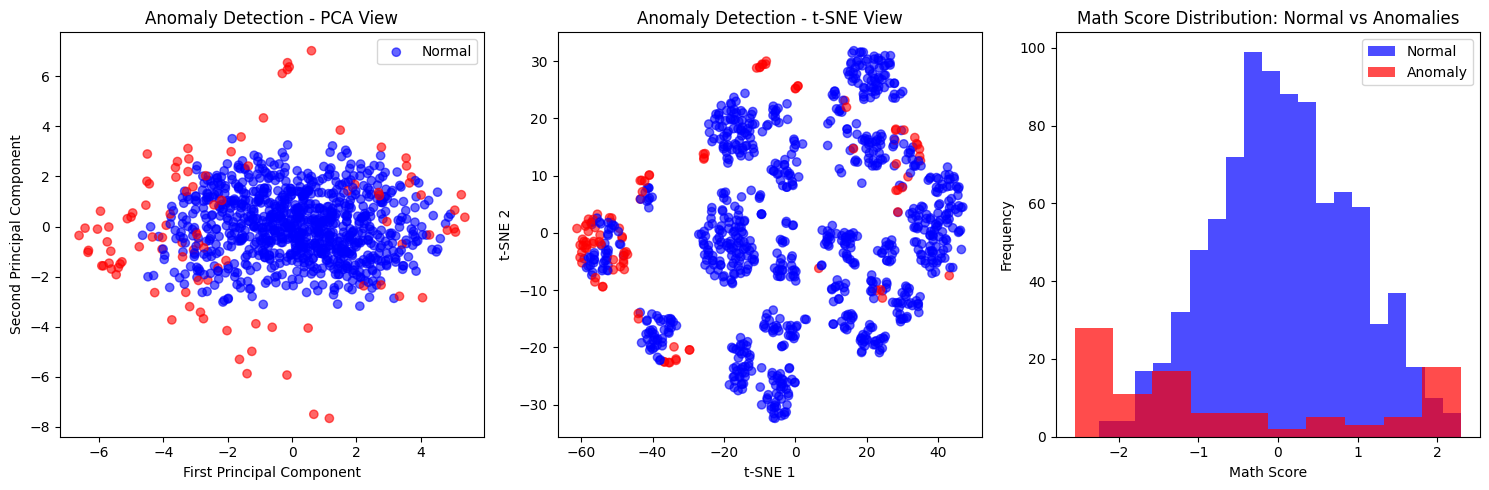


Anomaly Statistics:
Normal data math score stats:
count    901.000000
mean       0.074585
std        0.853268
min       -2.247163
25%       -0.483785
50%        0.058792
75%        0.669192
max        2.296925
Name: math_score, dtype: float64

Anomaly data math score stats:
count    101.000000
mean      -0.665361
std        1.723413
min       -2.552362
25%       -2.111518
50%       -1.297652
75%        0.886223
max        2.296925
Name: math_score, dtype: float64

UNSUPERVISED LEARNING SUMMARY
1. PCA Analysis:
   - Explained variance with 3 components: 0.5752

2. Clustering Results:
   - Optimal K-Means clusters: 3
   - K-Means silhouette score: 0.2126
   - Hierarchical silhouette score: 0.2087
   - DBSCAN best eps: 2.0, silhouette: 0.0214

3. Anomaly Detection:
   - Anomalies detected: 101 (10.08%)

4. Cluster Characteristics:
   - Cluster 0: 443 students, Avg scores - Math: 0.8, Reading: 0.8, Writing: 0.9
   - Cluster 1: 402 students, Avg scores - Math: -0.2, Reading: -0.4, Writing:

In [5]:
## Unsupervised Learning

### Import Additional Libraries for Unsupervised Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Prepare Data for Unsupervised Learning
# For unsupervised learning, we'll use all features including the target variable
# since we're looking for patterns in the data without predicting a specific target

# Load the original data again
# df_unsupervised = pd.read_csv('data_with_faults.csv')
print("Data shape:", df_unsupervised.shape)
print("Data info:")
df_unsupervised.info()

### Data Preprocessing for Unsupervised Learning
# Create a copy for unsupervised learning
df_cluster = df_unsupervised.copy()

# Encode categorical variables using Label Encoder
label_encoders = {}
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for column in categorical_columns:
    le = LabelEncoder()
    df_cluster[column] = le.fit_transform(df_cluster[column])
    label_encoders[column] = le

print("Data after encoding:")
df_cluster.head()

### Standardize the data for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled_df = pd.DataFrame(df_scaled, columns=df_cluster.columns)

print("Scaled data shape:", df_scaled_df.shape)
print("Scaled data sample:")
df_scaled_df.head()

## 1. Principal Component Analysis (PCA)

### Apply PCA for Dimensionality Reduction
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance ratio by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

print(f"\nCumulative explained variance: {cumulative_variance}")

### Plot PCA Explained Variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')
plt.xticks(range(1, len(explained_variance) + 1))

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Use first 3 components for visualization
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_scaled)

print(f"Explained variance with 3 components: {sum(pca_3d.explained_variance_ratio_):.4f}")

## 2. K-Means Clustering

### Determine Optimal Number of Clusters using Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

### Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

### Apply K-Means with Optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_with_clusters = df_unsupervised.copy()
df_with_clusters['Cluster'] = cluster_labels

print(f"Silhouette Score for {optimal_k} clusters: {silhouette_score(df_scaled, cluster_labels):.4f}")

### Visualize Clusters using PCA
plt.subplot(1, 3, 3)
scatter = plt.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel(f'First Principal Component')
plt.ylabel(f'Second Principal Component')
plt.title(f'K-Means Clustering (k={optimal_k}) - PCA View')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

### Analyze Cluster Characteristics
print("\nCluster Analysis:")
print("="*50)

cluster_analysis = df_with_clusters.groupby('Cluster').agg({
    'math_score': ['mean', 'std', 'count'],
    'reading_score': ['mean', 'std'],
    'writing_score': ['mean', 'std']
}).round(2)

print(cluster_analysis)

# Analyze categorical variables by cluster
print("\nCategorical Variables by Cluster:")
categorical_vars = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for var in categorical_vars:
    print(f"\n{var}:")
    cluster_crosstab = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters[var], normalize='index')
    print(cluster_crosstab.round(3))

## 3. Hierarchical Clustering

### Perform Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Calculate silhouette score
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

### Create Dendrogram
plt.figure(figsize=(15, 8))

# Calculate linkage for dendrogram (using a sample for better visualization)
sample_size = min(100, len(df_scaled))
sample_indices = np.random.choice(len(df_scaled), sample_size, replace=False)
sample_data = df_scaled[sample_indices]

linkage_matrix = linkage(sample_data, method='ward')

plt.subplot(2, 2, 1)
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

### Compare K-Means vs Hierarchical Clustering
plt.subplot(2, 2, 2)
scatter1 = plt.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering')
plt.colorbar(scatter1)

plt.subplot(2, 2, 3)
scatter2 = plt.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], c=hierarchical_labels, cmap='plasma', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering')
plt.colorbar(scatter2)

### Calculate Adjusted Rand Index to compare clusterings
ari_score = adjusted_rand_score(cluster_labels, hierarchical_labels)
print(f"Adjusted Rand Index between K-Means and Hierarchical: {ari_score:.4f}")

plt.subplot(2, 2, 4)
comparison_df = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [silhouette_score(df_scaled, cluster_labels), hierarchical_silhouette]
})
plt.bar(comparison_df['Method'], comparison_df['Silhouette Score'])
plt.title('Clustering Methods Comparison')
plt.ylabel('Silhouette Score')
plt.ylim(0, max(comparison_df['Silhouette Score']) * 1.1)

for i, v in enumerate(comparison_df['Silhouette Score']):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. DBSCAN Clustering

### Apply DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-distance graph
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.title('K-distance Graph for DBSCAN eps selection')
plt.grid(True)

# Try different eps values
eps_values = [0.5, 1.0, 1.5, 2.0]
dbscan_results = {}

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    
    if n_clusters > 1:
        silhouette_avg = silhouette_score(df_scaled, dbscan_labels)
        dbscan_results[eps] = {
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette_avg,
            'labels': dbscan_labels
        }
    else:
        dbscan_results[eps] = {
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': -1,
            'labels': dbscan_labels
        }

# Find best eps
best_eps = max(dbscan_results.keys(), key=lambda x: dbscan_results[x]['silhouette'] if dbscan_results[x]['silhouette'] > -1 else -1)
best_dbscan_labels = dbscan_results[best_eps]['labels']

print("DBSCAN Results:")
for eps, result in dbscan_results.items():
    print(f"eps={eps}: {result['n_clusters']} clusters, {result['n_noise']} noise points, silhouette={result['silhouette']:.4f}")

print(f"\nBest eps: {best_eps}")

### Visualize DBSCAN Results
plt.subplot(1, 3, 2)
scatter3 = plt.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], c=best_dbscan_labels, cmap='tab10', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'DBSCAN Clustering (eps={best_eps})')
plt.colorbar(scatter3)

plt.subplot(1, 3, 3)
methods = ['K-Means', 'Hierarchical', 'DBSCAN']
scores = [
    silhouette_score(df_scaled, cluster_labels),
    hierarchical_silhouette,
    dbscan_results[best_eps]['silhouette'] if dbscan_results[best_eps]['silhouette'] > -1 else 0
]
bars = plt.bar(methods, scores, color=['blue', 'orange', 'green'])
plt.title('Clustering Methods Comparison')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{score:.4f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 5. t-SNE Visualization

### Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(df_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter4 = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE: K-Means Clusters')
plt.colorbar(scatter4)

plt.subplot(1, 3, 2)
scatter5 = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_unsupervised['math_score'], cmap='coolwarm', alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE: Math Scores')
plt.colorbar(scatter5, label='Math Score')

plt.subplot(1, 3, 3)
scatter6 = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=pd.Categorical(df_unsupervised['parental_level_of_education']).codes, cmap='tab10', alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE: Parental Education Level')
plt.colorbar(scatter6)

plt.tight_layout()
plt.show()

## 6. Association Rules Mining (for categorical data)

### Prepare data for association rules
# Create binary variables for association rule mining
df_association = df_unsupervised.copy()

# Create score categories
df_association['math_score_category'] = pd.cut(df_association['math_score'], 
                                             bins=[0, 60, 80, 100], 
                                             labels=['Low', 'Medium', 'High'])
df_association['reading_score_category'] = pd.cut(df_association['reading_score'], 
                                                bins=[0, 60, 80, 100], 
                                                labels=['Low', 'Medium', 'High'])
df_association['writing_score_category'] = pd.cut(df_association['writing_score'], 
                                                bins=[0, 60, 80, 100], 
                                                labels=['Low', 'Medium', 'High'])

# Select categorical columns for association rules
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 
                   'test_preparation_course', 'math_score_category', 'reading_score_category', 
                   'writing_score_category']

# Create one-hot encoded dataframe
association_df = pd.get_dummies(df_association[categorical_cols])

print("Association Rules Data Shape:", association_df.shape)
print("Sample of association data:")
print(association_df.head())

# Calculate item frequencies
item_frequencies = association_df.mean().sort_values(ascending=False)
print("\nTop 10 Most Frequent Items:")
print(item_frequencies.head(10))

## 7. Anomaly Detection using Isolation Forest

from sklearn.ensemble import IsolationForest

### Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomaly_labels = iso_forest.fit_predict(df_scaled)

# -1 for anomalies, 1 for normal points
n_anomalies = np.sum(anomaly_labels == -1)
print(f"Number of anomalies detected: {n_anomalies} ({n_anomalies/len(df_scaled)*100:.2f}%)")

### Visualize anomalies
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['red' if x == -1 else 'blue' for x in anomaly_labels]
plt.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], c=colors, alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Anomaly Detection - PCA View')
plt.legend(['Normal', 'Anomaly'])

plt.subplot(1, 3, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors, alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Anomaly Detection - t-SNE View')

# Analyze anomalies
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomaly_data = df_unsupervised.iloc[anomaly_indices]

plt.subplot(1, 3, 3)
# Compare score distributions
normal_math_scores = df_unsupervised.iloc[np.where(anomaly_labels == 1)[0]]['math_score']
anomaly_math_scores = anomaly_data['math_score']

plt.hist(normal_math_scores, alpha=0.7, label='Normal', bins=20, color='blue')
plt.hist(anomaly_math_scores, alpha=0.7, label='Anomaly', bins=10, color='red')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution: Normal vs Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

print("\nAnomaly Statistics:")
print("Normal data math score stats:")
print(normal_math_scores.describe())
print("\nAnomaly data math score stats:")
print(anomaly_math_scores.describe())

## Summary of Unsupervised Learning Results

print("\n" + "="*60)
print("UNSUPERVISED LEARNING SUMMARY")
print("="*60)

print(f"1. PCA Analysis:")
print(f"   - Explained variance with 3 components: {sum(pca_3d.explained_variance_ratio_):.4f}")

print(f"\n2. Clustering Results:")
print(f"   - Optimal K-Means clusters: {optimal_k}")
print(f"   - K-Means silhouette score: {silhouette_score(df_scaled, cluster_labels):.4f}")
print(f"   - Hierarchical silhouette score: {hierarchical_silhouette:.4f}")
print(f"   - DBSCAN best eps: {best_eps}, silhouette: {dbscan_results[best_eps]['silhouette']:.4f}")

print(f"\n3. Anomaly Detection:")
print(f"   - Anomalies detected: {n_anomalies} ({n_anomalies/len(df_scaled)*100:.2f}%)")

print(f"\n4. Cluster Characteristics:")
for cluster_id in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster_id]
    avg_math = cluster_data['math_score'].mean()
    avg_reading = cluster_data['reading_score'].mean()
    avg_writing = cluster_data['writing_score'].mean()
    print(f"   - Cluster {cluster_id}: {len(cluster_data)} students, "
          f"Avg scores - Math: {avg_math:.1f}, Reading: {avg_reading:.1f}, Writing: {avg_writing:.1f}")
